# Data set description

download data: https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat

#### The data has two columns: 'data' and 'label'
**data key**: contains an array with  one  row  per  instance  and  one  column per feature

**target key**: contains an array with the labels

--------------------------------------------------------------------------------

#### There are **70.000** images (instances), each image has **784 features**.

#### Each  feature  simply  represents  **one pixel's** intensity,  from  0(white) to 255 (black).

#### One instance is an **array** with 784 elements.
--------------------------------------------------------------------------------
To have a sneak peek at the data, simply grab one instance (row) and reshape it's feature vector (784 elements) to a 28x28 array (grid).

In [48]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "/home/og/oguzee@gmail.com/Studium/Master - Data Science/Workflow and Applications/5. Presentation"
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [49]:
from scipy.io import loadmat

mnist_path = "./mnist-original.mat"


mnist_raw = loadmat(mnist_path)
mnist = {
        "DESCR": "mldata.org dataset: mnist-original",
        "COL_NAMES": ["label", "data"],
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
    }
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [50]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [51]:
28*28

784

In [52]:
y.shape

(70000,)

In [53]:
some_digit = X[36000]
print('len:', len(some_digit))

len: 784


Saving figure some_digit_plot


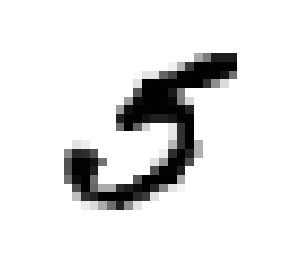

In [54]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [55]:
y[36000]

5.0

#### The data is already split in training (first 60.000 images) and test (last 10.000 images) sets.

In [56]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Training a Binary Classifier
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

First, let's **shuffle** the training data. This guarantees that all cross-validation folds will be similiar (no missing digits per fold).

Also, some learning algorithms are **sensitive to the order of training instances** and perform poorly when they get many similiar examples in a row.

Shuffling ensures that both cases.

In [57]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Let's simplify the problem, by just writing a classifier which differentiates between five and non-fives.

Let's create the target vectors for this task:

In [58]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Now let's pick a classifier. A good start is the Stochastic Gradient Descent (SGD) Classifier.

In [59]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
# max_iter = max number of passes over the data (aka epochs)
# random_state = seed
sgd_clf.fit(X_train, y_train_5) # train it to the training set

sgd_clf.predict([some_digit]) # some_digit is a 5

array([ True])

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
http://scikit-learn.org/stable/modules/sgd.html#stochastic-gradient-descent

*The  SGDClassifier  relies  on  randomness  during  training  (hence the name   “stochastic”).   If   you   want   reproducible   results,   you should set the random_state parameter.*

The classifier guesses that this image represents a 5 (True). Looks like it guessed rightin this particular case! Now, let’s evaluate this model’s performance.

### Permormance Measures
#### Evaluating a classfier.

#### Measuring accuracy using cross-validation
A good way to evaluate is a cross-validation (see *k-fold_cross_validation.ipynb*).

*EXTRA*

Occasionally you will need more control over the cross-validation process than what Scikit-Learn   provides   off-the-shelf.   In   these   cases,   you   can   implement   cross-validation  yourself;  the  following  code  does roughly the same thing as Scikit-Learn’s cross_val_score() function, and prints the same result

In [60]:
# Extra
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
# n_splits = Number of folds

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # sgd_clf is an existing classifier
    # .clone() constructs a new estimator with the same parameters.*

    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

http://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html
    
Let’s  use  the  cross_val_score()  function  to  evaluate  your  SGDClassifier  model using   K-fold   cross-validation,   with   three  folds.   *Remember   that   K-fold   cross-validation means splitting the training set into K-folds (in this case, three), then making  predictions  and  evaluating  them  on  each  fold  using  a  model  trained  on  the remaining folds*


In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# cv = number of folds
# scoring** = scoring paramater, for more check the link below

# >>> array([ 0.9502 ,  0.96565,  0.96495])
# output is the ratio of correct predictions per fold.

array([0.9502 , 0.96565, 0.96495])

**http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

So it has a 95% accuracy on all folds on classifying the instances into fives and non-fives.
Before  you  get  too  excited,  let’s  look  at  a  very dumb classifier that just classifies every single image in the “non-5” class:

In [62]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [63]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

90% accuracy, wow! This is simply because only 10% of the images are 5. Easy explained: If you are guessing that am image is a non-5, you'll be right 90% of the time. Beats Nostradamus.
So, accuracy is generally not the preffered performance measure for classifiers. Especially when you're working with skewed data (e.g., some classes are much more frequent than others).

#### Confusion Matrix

A much better way to evaluate the performance is to look at the **confusion matrix**. It represents the times instances of class A are classified as class B.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets.

In [64]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn-model-selection-cross-val-predict

Just  like  the  cross_val_score()  function,  cross_val_predict()  performs  K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions  made  on  each  test  fold.  *This  means  that  you  get  a  clean  prediction  for  each instance  in  the  training  set  (“clean”  meaning  that  the  prediction  is  made  by  a  model that never saw the data during training).*


Now we can get the confusion matrix using the confusion_matrix() function.   Just   pass   it   the   target   classes   (y_train_5)   and   the   predicted   classes(y_train_pred):

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

#### Precision / Recall

The confusion matrix gives you access to calculating more concise metrics like precision.

Precision of the classifier being the positive predictions.

**precision = TP / (TP + FP)**

TP is the number of true positives, and FP is the number of false positives.

Precision is typically used along with another metric named recall, also called sensitivity or true positive rate
(TPR): this is the ratio of positive instances that are correctly detected by the classifier

**recall = TP / (TP + FN)**

FN is of course the number of false negatives.

So, if you are confused:

<img src=cm.png>

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:

In [66]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)

0.7687135020350381

In [67]:
recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

0.801328168234643

Now you see that the 5-detector doesn't performing that well!
**When it's claiming to have a five, it is only 77% of the time right. Moreover, it only detects 80% of the 5s**.

Precision example: you want a NSFW picture filter.
It is better to have a high accuracy (with high true & false positives), because it is better to have some non-nsfw classified as nsfw than the other way around.

Recall example: you want to find potential shoplifters.
It is better to have a high recall (with high true positives & high negatives), because it is better to have some innocent people checked rather than to let the shoplifters slip away.

----------------------------------------------------------------------
Another convenient metric is the F1 score, especially to compare classifiers. is the harmonic mean of precision and recall, whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values.

As a result, the classifier will only get a high F1 score if both recall and precision are
high.

**F1 = TP / (TP + ((FN + FP) / 2))**

To compute the F 1 score, simply call the f1_score() function:

In [68]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

#### Precision / Recall Tradeoff

To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. **For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class**. 

*The following figure shows a few digits  positioned from the lowest score on the left to the highest score on the right. Suppose the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one true positive becomes a false negative, decreasing recall down to 50%. *

Conversely, lowering the threshold increases recall and reduces precision.

<img src=precision_recall_tradeoff.png>

To set a threshold, you should first get the score for the prediction with the classifiers decision_function() method, which returns a score for each instance.
Since Scikit does not let you threshold directly, we will use the score to set a arbitary threshold.

In [69]:
y_scores = sgd_clf.decision_function([some_digit]) # Remember: some_digit is a 5
y_scores

array([161855.74572176])

In [70]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [71]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This also confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 200,000.

So how can you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that you want it to return decision scores instead of predictions:

In [72]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Now with these scores you can compute precision and recall for all possible thresholds using the precision_recall_curve() function:

In [73]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finally, you can plot precision and recall as functions of the threshold value using Matplotlib.

Saving figure precision_recall_vs_threshold_plot


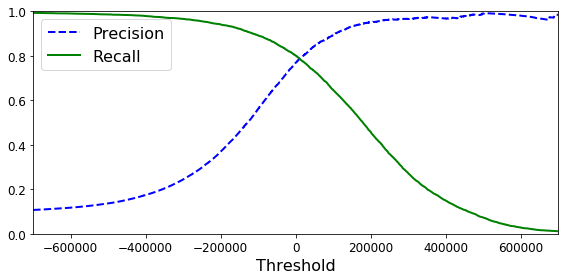

In [74]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

So that's how you decide wether you wanna catch the potential shoplifter or filter nsfw content.

*You may wonder why the precision curve is bumpier than the recall
curve in the plot. The reason is that precision may sometimes go
down when you raise the threshold (although in general it will go
up). To understand why, look back at threshold-figure and notice what
happens when you start from the central threshold and move it just
one digit to the right: precision goes from 4/5 (80%) down to 3/4
(75%). On the other hand, recall can only go down when the thres‐
hold is increased, which explains why its curve looks smooth.*

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task. Another way to select a good precision/recall tradeoff is to plot precision directly against recall, as shown below.

Saving figure precision_vs_recall_plot


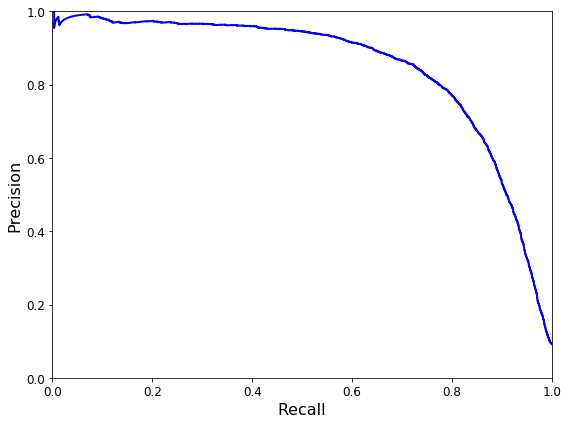

In [75]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will probably want to select a precision/recall tradeoff just before that drop—for example, at around 60% recall. But of course the choice depends on your project. 

So let’s suppose you decide to aim for 90% precision. You look up the first plot (zooming in a bit) and find that you need to use a treshold of about 70,000. To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can just run this code:

In [76]:
(y_train_pred == (y_scores > 0)).all()

True

In [77]:
y_train_pred_90 = (y_scores > 100000)
precision_score(y_train_5, y_train_pred_90)

0.8935031847133758

In [78]:
recall_score(y_train_5, y_train_pred_90)

0.646928610957388

Great, you have a 90% precision classifier (or close enough)! As you can see, it is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. Hmm, not so fast. A high-precision classifier is not very useful if its recall is too low! 

#### ROC

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function:

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


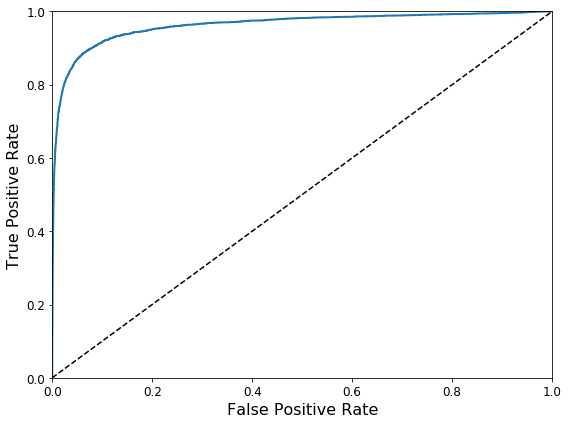

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967155

*Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the topright corner).*

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier . First, you need to get scores for each instance in the training set. But due to the way it works (see Chapter 7), the RandomForestClassifier class does not have a decision_function() method. Instead it has a predict_proba() method. Scikit-Learn classifiers generally have one or the other. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5)

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest.shape

(60000, 2)

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive class’s probability as the score:

In [83]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC curve as well to see how they compare.

Saving figure roc_curve_comparison_plot


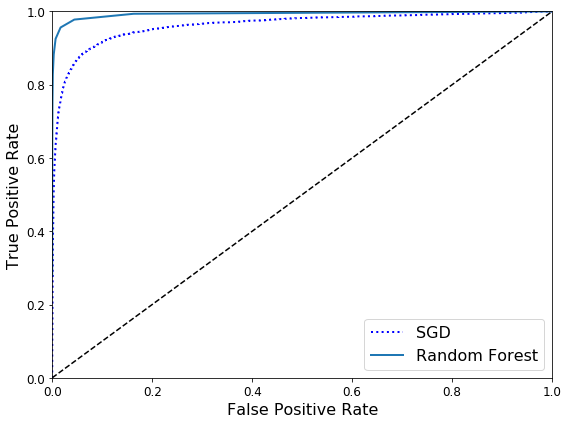

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

As you can see, the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a result, its ROC AUC score is also significantly better:

In [85]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [86]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [87]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

### Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest). 

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need totrain N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred. Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [88]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

That was easy! This code trains the SGDClassifier on the training set using the original target classes from 0 to 9 ( y_train ), instead of the 5-versus-all target classes
( y_train_5 ). Then it makes a prediction (a correct one in this case). Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the highest score.
To see that this is indeed the case, you can call the decision_function() method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class:

In [89]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [90]:
np.argmax(some_digit_scores)

5

In [91]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [92]:
sgd_clf.classes_[5]

5.0

*When a classifier is trained, it stores the list of target classes in its
classes_ attribute, ordered by value. In this case, the index of each
class in the classes_ array conveniently matches the class itself
(e.g., the class at index 5 happens to be class 5), but in general you
won’t be so lucky.*

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier :

In [93]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [94]:
len(ovo_clf.estimators_)

45

In [95]:
# Just as easy
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes. You can call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class:

In [96]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

You can see that the classifier is fairly confident about its prediction: the 0.8 at the 5th
index in the array means that the model estimates an 80% probability that the image represents a 5. It also thinks that the image could instead be a 0 or a 3 (10% chance
each).

Now of course you want to evaluate these classifiers. As usual, you want to use cross-validation. Let’s evaluate the SGDClassifier ’s accuracy using the cross_val_score()
function:

In [97]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

It gets over 84% on all test folds. If you used a random classifier, you would get 10%
accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs increases accuracy above
90%:

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# StandardScaler(): Standardize features by removing the mean and scaling to unit variance
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

array([0.91011798, 0.90874544, 0.906636  ])

### Error Analysis

Of course, if this were a real project, you would follow the steps in your Machine
Learning project checklist: exploring data preparation options, trying out multiple models, shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV , and automating as much as possible, as you did in the
previous chapter. Here, we will assume that you have found a promising model and
you want to find ways to improve it. One way to do this is to analyze the types of
errors it makes.

First, you can look at the confusion matrix. You need to make predictions using the
cross_val_predict() function, then call the confusion_matrix() function, just like
you did earlier:

In [99]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

That’s a lot of numbers. It’s often more convenient to look at an image representation
of the confusion matrix, using Matplotlib’s matshow() function:

Saving figure confusion_matrix_plot


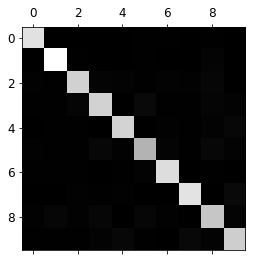

In [100]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. The 5s look slightly darker than the
other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits. In fact, you can verify
that both are the case.
Let’s focus the plot on the errors. First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare error
rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):

Saving figure confusion_matrix_errors_plot


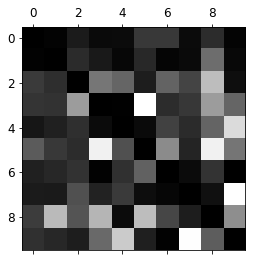

In [101]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Now you can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. The columns for
classes 8 and 9 are quite bright, which tells you that many images get misclassified as
8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s
and 9s are often confused with other digits. Conversely, some rows are pretty dark,
such as row 1: this means that most 1s are classified correctly (a few are confused
with 8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for
example, there are more 5s misclassified as 8s than the reverse.

Analyzing the confusion matrix can often give you insights on ways to improve your
classifier. Looking at this plot, it seems that your efforts should be spent on improving
classification of 8s and 9s, as well as fixing the specific 3/5 confusion. For example,
you could try to gather more training data for these digits. Or you could engineer
new features that would help the classifier—for example, writing an algorithm to
count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you
could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make
some patterns stand out more, such as closed loops.

Analyzing individual errors can also be a good way to gain insights on what your
classifier is doing and why it is failing, but it is more difficult and time-consuming.
For example, let’s plot examples of 3s and 5s (the plot_digits() function just uses
Matplotlib’s imshow() function; see this chapter’s Jupyter notebook for details):

In [102]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure error_analysis_digits_plot


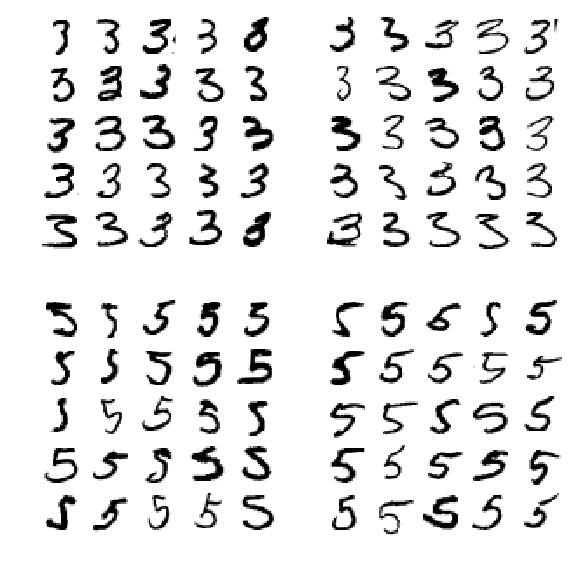

In [103]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on
the right show images classified as 5s. Some of the digits that the classifier gets wrong
(i.e., in the bottom-left and top-right blocks) are so badly written that even a human
would have trouble classifying them (e.g., the 5 on the 8 th row and 1 st column truly
looks like a 3). However, most misclassified images seem like obvious errors to us,
and it’s hard to understand why the classifier made the mistakes it did. 3 The reason is
that we used a simple SGDClassifier , which is a linear model. All it does is assign a
weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few
pixels, this model will easily confuse them.
The main difference between 3s and 5s is the position of the small line that joins the
top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left,
the classifier might classify it as a 5, and vice versa. In other words, this classifier is
quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion
would be to preprocess the images to ensure that they are well centered and not too
rotated. This will probably help reduce other errors as well.

### Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you
may want your classifier to output multiple classes for each instance. For example,
consider a face-recognition classifier: what should it do if it recognizes several people
on the same picture? Of course it should attach one label per person it recognizes. Say
the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then
when it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning
“Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple
binary labels is called a multilabel classification system.

We won’t go into face recognition just yet, but let’s look at a simpler example, just for
illustration purposes:

In [104]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

This code creates a y_multilabel array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9) and the second
indicates whether or not it is odd. The next lines create a KNeighborsClassifier
instance (which supports multilabel classification, but not all classifiers do) and we
train it using the multiple targets array. Now you can make a prediction, and notice
that it outputs two labels:

In [105]:
knn_clf.predict([some_digit])

array([[False,  True]])

And it gets it right! The digit 5 is indeed not large ( False ) and odd ( True ).
There are many ways to evaluate a multilabel classifier, and selecting the right metric
really depends on your project. For example, one approach is to measure the F 1 score
for each individual label (or any other binary classifier metric discussed earlier), then
simply compute the average score. This code computes the average F 1 score across all
labels:

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware).



In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

This assumes that all labels are equally important, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want
to give more weight to the classifier’s score on pictures of Alice. One simple option is o give each label a weight equal to its support (i.e., the number of instances with that
target label). To do this, simply set average="weighted" in the preceding code.

### Multioutput Classification

The last type of classification task we are going to discuss here is called multioutput multiclass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values).
To illustrate this, let’s build a system that removes noise from images. It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the
classifier’s output is multilabel (one label per pixel) and each label can have multiple
values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.

*The line between classification and regression is sometimes blurry,
such as in this example. Arguably, predicting pixel intensity is more
akin to regression than to classification. Moreover, multioutput
systems are not limited to classification tasks; you could even have
a system that outputs multiple labels per instance, including both
class labels and value labels.*

Let’s start by creating the training and test sets by taking the MNIST images and
adding noise to their pixel intensities using NumPy’s randint() function. The target
images will be the original images:

In [106]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Let’s take a peek at an image from the test set (yes, we’re snooping on the test data, so
you should be frowning right now):

In [108]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

Saving figure noisy_digit_example_plot


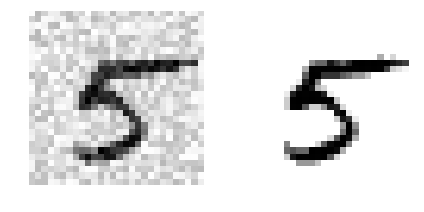

In [109]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

On the left is the noisy input image, and on the right is the clean target image. Now
let’s train the classifier and make it clean this image:

Saving figure cleaned_digit_example_plot


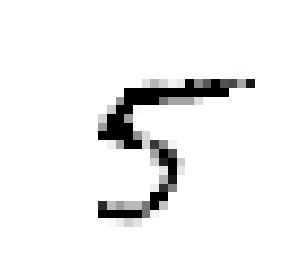

In [110]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

Looks close enough to the target! This concludes our tour of classification. Hopefully
you should now know how to select good metrics for classification tasks, pick the
appropriate precision/recall tradeoff, compare classifiers, and more generally build
good classification systems for a variety of tasks.